# Clasificación de Retornos de Radar con Gaussian Naive Bayes

## Introducción

En este notebook se implementa un flujo completo de procesamiento y análisis para la clasificación de señales de radar utilizando el modelo **Gaussian Naive Bayes**. El conjunto de datos proviene del dataset *Ionosphere Radar Returns*, el cual contiene mediciones de 34 características extraídas de retornos de radar. Cada muestra está etiquetada como perteneciente a una de dos clases:

- **'g'** (good): retorno de radar que indica la presencia de una estructura ionosférica coherente.
- **'b'** (bad): retorno de radar que indica la ausencia de dicha estructura.

El modelo Gaussian Naive Bayes asume que las características siguen distribuciones normales condicionadas a la clase. A lo largo del notebook, se exploran estas suposiciones, se preparan los datos, se visualizan las distribuciones, se aplican pruebas de normalidad y se implementa el clasificador desde cero.

## Objetivos

- **Cargar y explorar** el conjunto de datos de retornos de radar.
- **Analizar estadísticamente** las características del dataset.
- **Visualizar** la distribución de cada característica y compararla con una distribución normal teórica.
- **Aplicar pruebas de normalidad** para evaluar la validez de la suposición de Gaussian Naive Bayes.
- **Implementar** el cálculo manual de probabilidades a priori, likelihoods y probabilidades posteriores.
- **Evaluar** el desempeño del clasificador mediante métricas estándar (accuracy, precision, recall, F1-score).
- **Visualizar** la distribución de probabilidades posteriores y analizar la confianza del modelo.

Este ejercicio no solo permite consolidar los conceptos teóricos detrás de Naive Bayes, sino también comprender la importancia de la exploración previa de los datos y de la validación de las suposiciones del modelo.

---


## Descripción del Dataset

El dataset utilizado en este análisis es el **Ionosphere Radar Returns Dataset**, disponible en el repositorio del curso. Este conjunto de datos contiene medidas obtenidas a partir de señales de radar dirigidas hacia la ionosfera.

Cada muestra del dataset corresponde a un pulso de radar, para el cual se han registrado 34 características numéricas que describen propiedades físicas de la señal recibida, como amplitudes y fases de los retornos de radar en diferentes momentos y frecuencias.

El objetivo es predecir si la señal de radar corresponde a un retorno **"bueno"** (estructura coherente en la ionosfera) o **"malo"** (retorno disperso sin estructura), etiquetado en la columna `label` con las siguientes clases:

- `'g'` → *good*: el radar detecta una estructura coherente.
- `'b'` → *bad*: el radar no detecta una estructura coherente.

### Estructura del dataset

- **Número de muestras**: 351
- **Número de características**: 34 (todas numéricas y continuas)
- **Variable objetivo**: `label` (clase binaria: `'g'` o `'b'`)

### Columnas

- `feature1`, `feature3`, `feature4`, ..., `feature34`: características numéricas extraídas de la señal de radar.
- `label`: variable objetivo que indica la clase de la muestra.

### Contexto del problema

El análisis de estos retornos de radar es importante en aplicaciones relacionadas con la **detección de irregularidades en la ionosfera**, que afectan la propagación de señales de radio. Un clasificador automático como Gaussian Naive Bayes puede ser útil para automatizar la clasificación de retornos en sistemas de radar de vigilancia.

---


## Paso 1: Cargar y explorar el dataset

**Instrucciones:**
- Descarga el dataset desde el repositorio de GitHub del curso. El archivo se encuentra en `datasets/ionosphere_radar_returns/original data.csv`.
- Carga el dataset utilizando pandas.
- Muestra las primeras filas (`df.head()`) del dataset.
- Imprime la cantidad total de filas y columnas del dataset.

In [144]:
import pandas as pd

data = pd.read_csv('../datasets/ionosphere_radar_returns/original data.csv')
data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Paso 2: División del dataset en entrenamiento y prueba

**Instrucciones:**
- Construye la función `load_and_split_dataset` para cargar el dataset y dividirlo en conjuntos de entrenamiento y prueba.
- Asegúrate de que la variable objetivo sea `'label'`.
- Realiza la división estratificada para mantener la proporción de clases.
- Asigna los conjuntos resultantes a las variables `X_train`, `X_test`, `y_train` y `y_test`.
- Asigna una proporción del 20% a los datos de prueba y 80% a los datos de entrenamiento.

In [145]:
from sklearn.model_selection import train_test_split

def load_and_split_dataset(filepath, test_size=0.2, random_state=42):
    df = pd.read_csv(filepath)
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

---

En esta asignación se utilizará el modelo Gaussian Naive Bayes, el cual emplea la función de densidad normal para calcular la verosimilitud (likelihood) de cada característica (feature) dado cada clase. Para ello, será necesario calcular la media y la desviación estándar de cada columna del conjunto de entrenamiento. Estos parámetros permitirán estimar la probabilidad de observar los valores de cada muestra bajo la hipótesis de normalidad, lo que es necesario para el cálculo de las probabilidades posteriores y la clasificación.

---

## Paso 3: Estadística descriptiva y visualización de los datos

**Instrucciones:**
- Calcula estadísticas descriptivas (mínimo, máximo, media y desviación estándar) para cada característica del conjunto de entrenamiento.
- Muestra los resultados en una tabla utilizando la función `'label'`

In [146]:
from IPython.display import display

# Load and split the dataset
X_train, X_test, y_train, y_test = load_and_split_dataset('../datasets/ionosphere_radar_returns/original data.csv')

# Calculate statistics for each feature in the training set
stats = X_train.agg(['min', 'max', 'mean', 'std']).transpose()
display(stats)

,min,max,mean,std
feature1,0.0,1.0,0.885714,0.318728
feature3,-1.0,1.0,0.656123,0.483532
feature4,-1.0,1.0,0.054283,0.440366
feature5,-1.0,1.0,0.612159,0.503588
feature6,-1.0,1.0,0.107498,0.474293
feature7,-1.0,1.0,0.532923,0.502207
feature8,-1.0,1.0,0.127726,0.527988
feature9,-1.0,1.0,0.518071,0.495504
feature10,-1.0,1.0,0.187574,0.495878
feature11,-1.0,1.0,0.477975,0.551251


---

Antes de proceder con la clasificación, es fundamental analizar la distribución de los datos. El clasificador Gaussian Naive Bayes asume que las características siguen una distribución normal, pero ¿realmente es así? ¿En qué medida los datos se asemejan a una distribución normal? 

Para responder a estas preguntas, primero visualizaremos los histogramas de frecuencia de cada característica del conjunto de entrenamiento. Esto nos permitirá identificar posibles desviaciones respecto a la normalidad y comprender mejor el comportamiento de los datos antes de aplicar el modelo.

---

## Paso 4: Visualización de histogramas para cada característica

**Instrucciones:**
- Utiliza los datos de entrenamiento (`X_train`) para graficar histogramas de frecuencia para cada característica.
- Organiza los histogramas en una cuadrícula de 2 columnas para facilitar la visualización.
- Asegúrate de etiquetar correctamente los ejes y los títulos de cada subgráfico.
- Añade un título general a la figura.


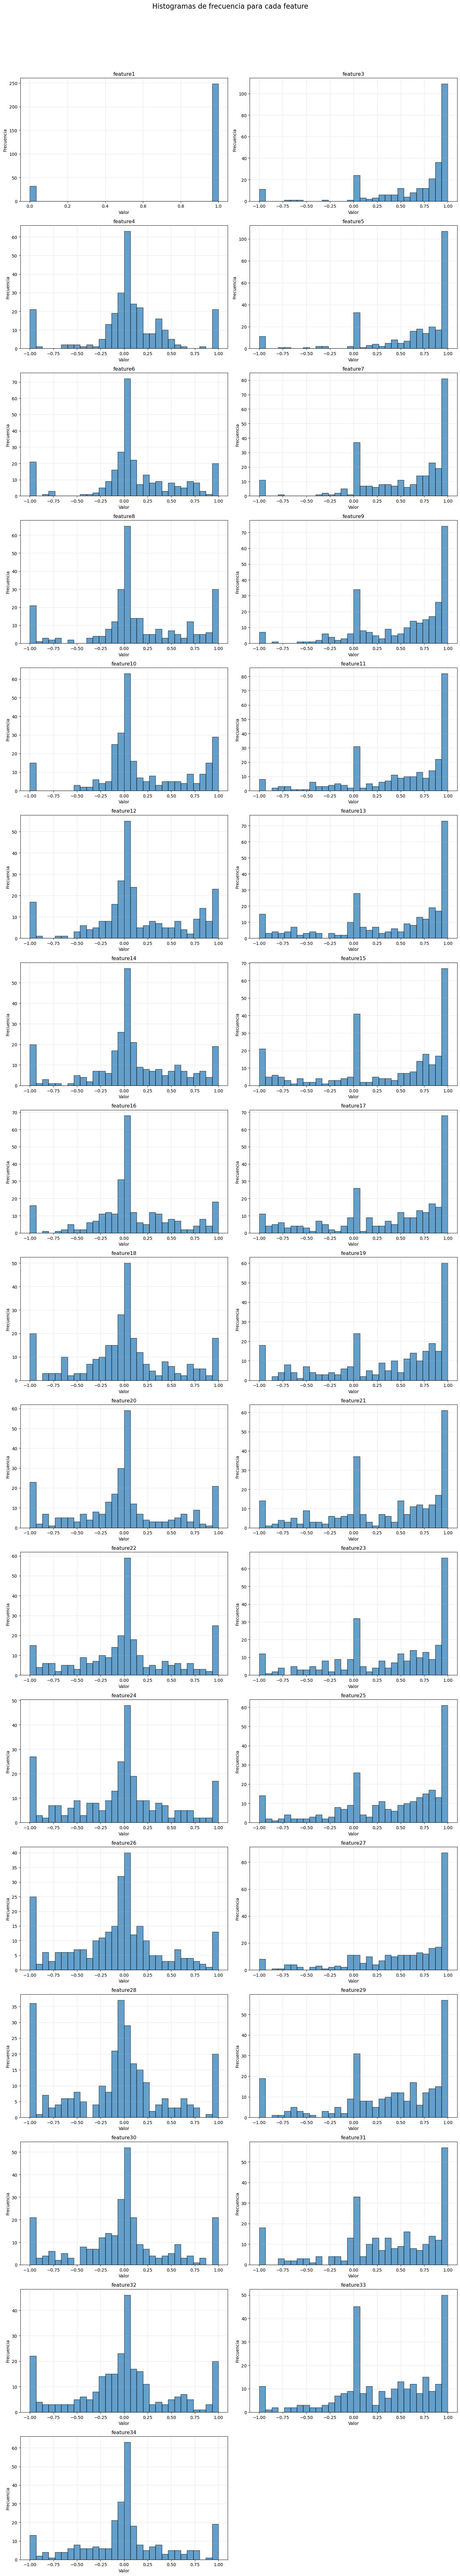

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature columns
features = X_train.columns
n_features = len(features)

# Calculate grid dimensions (2 columns)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot histogram for each feature
for i, feature in enumerate(features):
    axes[i].hist(X_train[feature], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

# Hide empty subplots if any
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Histogramas de frecuencia para cada feature', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

Una manera de aproximar la distribución de los datos observados en un histograma de frecuencias es mediante la **estimación de densidad por kernel** (*Kernel Density Estimation*, KDE). La KDE permite obtener una función suave que aproxima la función de densidad de probabilidad (PDF) de los datos, facilitando la comparación visual con distribuciones teóricas y ayudando a identificar desviaciones respecto a la normalidad o a la forma general de la distribución.

La estimación de densidad por kernel es una técnica **no paramétrica**, es decir, no asume una forma específica para la distribución de los datos. En su lugar, utiliza un **kernel** (por ejemplo, una función gaussiana) para estimar la densidad en cada punto, sumando las contribuciones de todas las muestras en el conjunto de datos. El estimador de densidad se expresa como:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^n K\left( \frac{x - x_i}{h} \right)
$$

donde:

- $\hat{f}(x)$ es la densidad estimada en el punto $x$,
- $n$ es el número de muestras,
- $h$ es el parámetro de ancho de banda (controla el grado de suavizado),
- $K(\cdot)$ es la función kernel, típicamente una función gaussiana,
- $x_i$ son las observaciones del conjunto de datos.

Como complemento al uso de la KDE, la representación de un **histograma normalizado** proporciona una estimación discreta de la frecuencia relativa de los valores observados. Mientras que el histograma muestra la frecuencia de aparición de los datos en intervalos discretos, la KDE ofrece una estimación continua y suavizada de la densidad de probabilidad subyacente.

La visualización conjunta del histograma normalizado y de la KDE facilita el análisis exploratorio de las variables. En particular, permite:

- detectar **asimetrías** o sesgos en la distribución,
- identificar posibles **modas múltiples** (multimodalidad),
- evaluar la **normalidad** de los datos.

Este análisis es especialmente relevante cuando se utilizan modelos que suponen normalidad en las variables predictoras, como el **clasificador Gaussian Naive Bayes**. Si las distribuciones de los datos se alejan considerablemente de la normalidad, puede ser necesario aplicar técnicas de transformación o reconsiderar el uso de modelos basados en dicha suposición.

---


## Paso 5: Comparación entre la PDF estimada y la PDF normal teórica

**Instrucciones:**

- Para cada característica del conjunto de entrenamiento (`X_train`), genera una visualización que incluya en un mismo subgráfico:
    - El **histograma normalizado** de la característica, representando la frecuencia relativa de los valores observados.
    - La **PDF estimada** de los datos mediante **KDE** (*Kernel Density Estimation*), proporcionando una curva suave de la densidad.
- Organiza los subgráficos en una cuadrícula con **2 columnas** para facilitar la comparación visual entre las diferentes características.
- Etiqueta de forma adecuada los **ejes** y asigna un **título descriptivo** a cada subgráfico.
- Incluye una **leyenda** en cada subgráfico para distinguir claramente el histograma y la KDE.
- Añade un **título general** a la figura que resuma el propósito de la visualización.


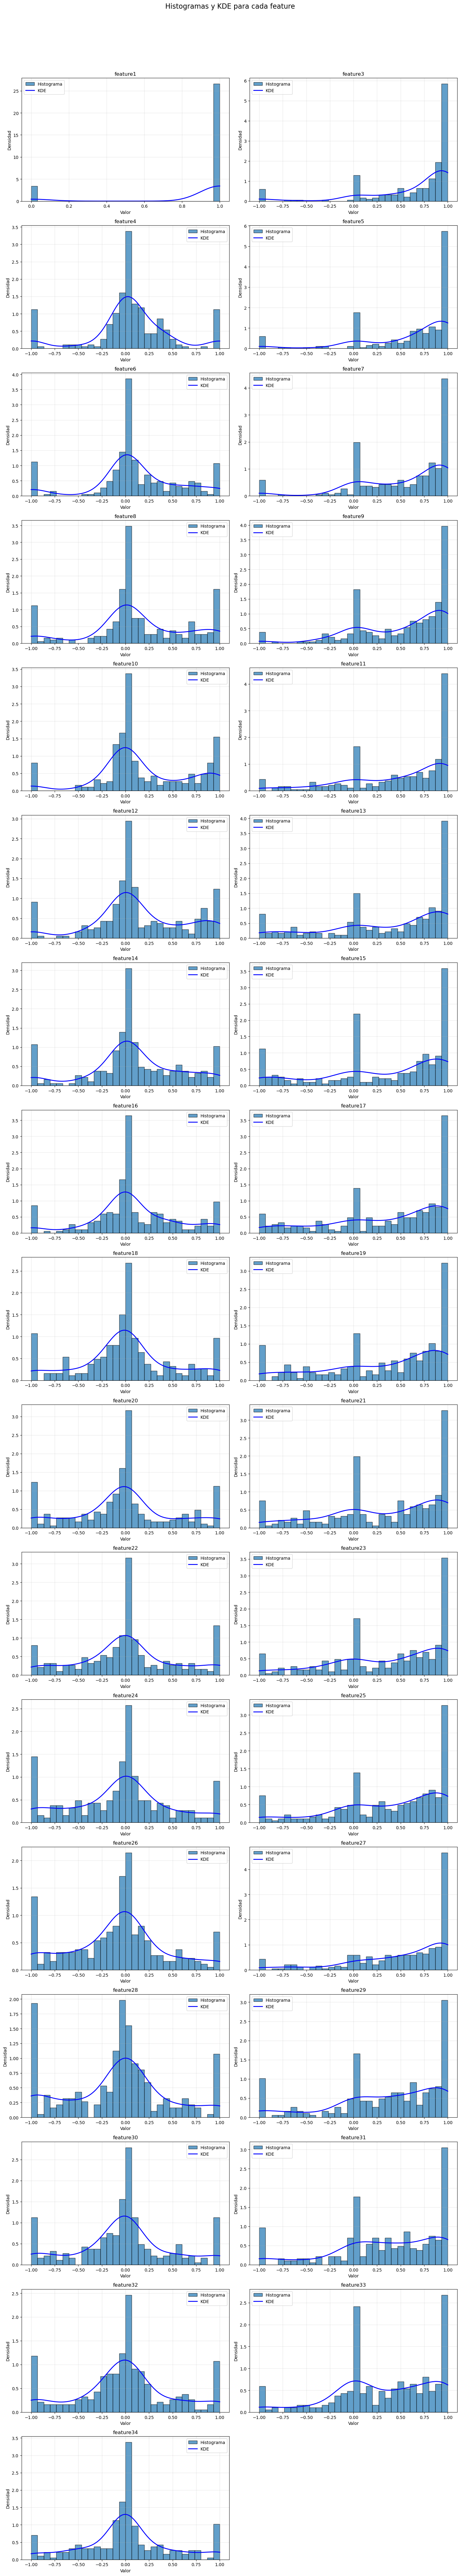

In [148]:
from scipy.stats import gaussian_kde

# Create new subplots for histogram + KDE
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot histogram and KDE for each feature
for i, feature in enumerate(features):
    data_feat = X_train[feature]
    # Histograma normalizado
    axes[i].hist(data_feat, bins=30, alpha=0.7, edgecolor='black', density=True, label='Histograma')
    # KDE
    kde = gaussian_kde(data_feat)
    x = np.linspace(data_feat.min(), data_feat.max(), 200)
    pdf_data = kde(x)
    axes[i].plot(x, pdf_data, color='blue', linewidth=2, label='KDE')
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

# Hide empty subplots if any
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Histogramas y KDE para cada feature', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

Si todo se ha realizado correctamente, al finalizar este paso se podrá visualizar la función de densidad de probabilidad (PDF) de cada característica mediante la KDE superpuesta al histograma normalizado.

El modelo Gaussian Naive Bayes asume que cada variable sigue una distribución normal. Comparar la KDE con la PDF normal teórica permite evaluar visualmente qué tan bien se aproxima la distribución real de los datos a esta suposición.

Aunque Gaussian Naive Bayes se aplicará en cualquier caso, este análisis ayuda a interpretar mejor los resultados del modelo y a comprender el comportamiento de cada variable dentro del marco de esta suposición de normalidad.

---

## Paso 5: Comparación visual entre la PDF estimada y la PDF normal teórica

**Instrucciones:**
- Para cada característica del conjunto de entrenamiento (`X_train`), grafica en el mismo subgráfico:
    - El histograma de la característica (normalizado a densidad).
    - La PDF estimada de los datos usando KDE (Kernel Density Estimation).
    - La PDF normal teórica calculada con la media y desviación estándar de los datos.
- Organiza los subgráficos en una cuadrícula de 2 columnas.
- Añade leyendas, títulos y etiquetas a cada subgráfico para identificar cada curva.
- Incluye un título general para la figura.

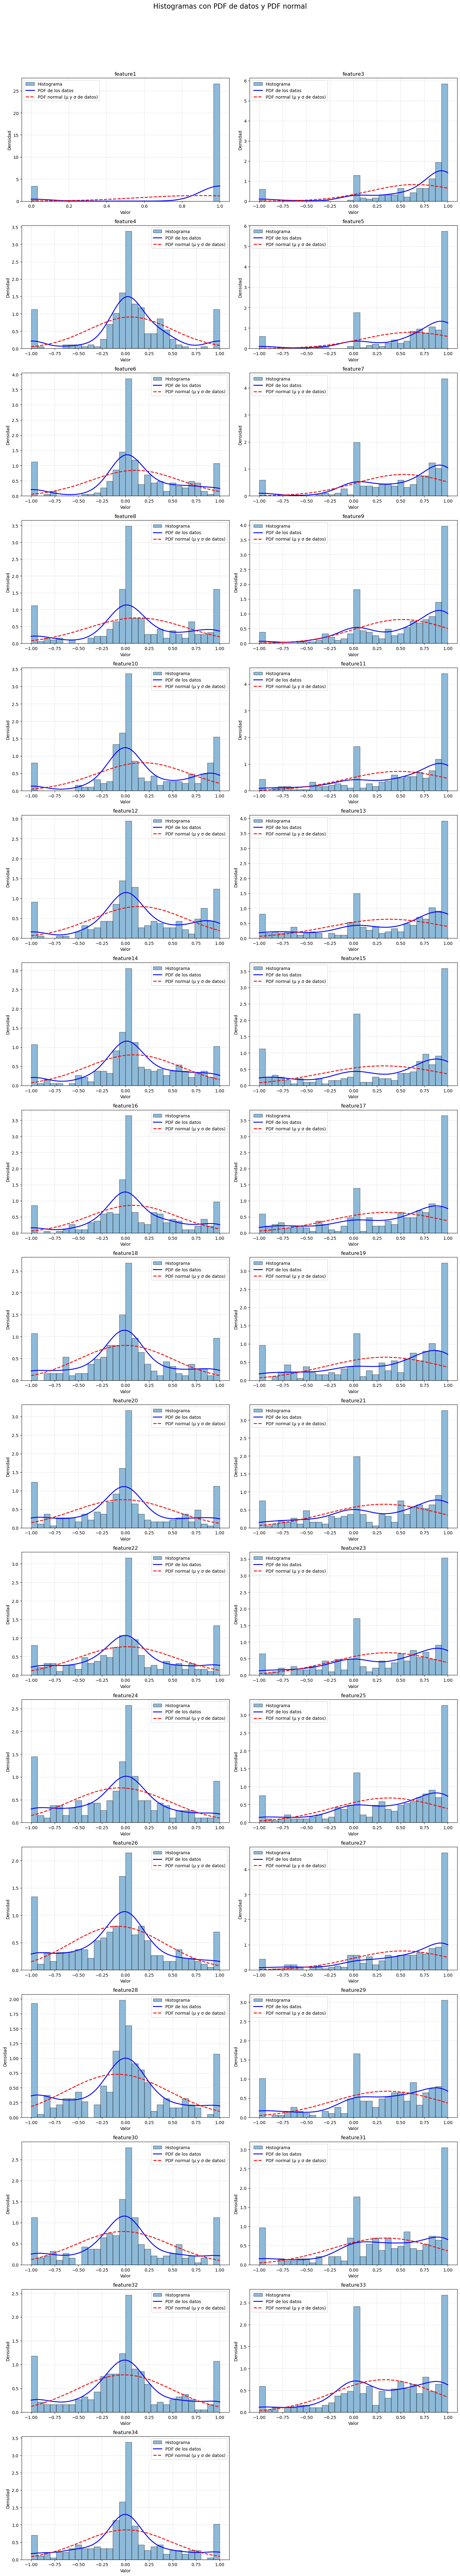

In [149]:
from scipy.stats import norm, gaussian_kde

# Create new subplots for histogram + PDF
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot histogram and PDFs for each feature
for i, feature in enumerate(features):
    data_feat = X_train[feature]
    # Histograma normalizado
    axes[i].hist(data_feat, bins=30, alpha=0.5, edgecolor='black', density=True, label='Histograma')
    
    # PDF estimada de los datos usando KDE (Kernel Density Estimation)
    kde = gaussian_kde(data_feat)
    x = np.linspace(data_feat.min(), data_feat.max(), 200)
    pdf_data = kde(x)
    axes[i].plot(x, pdf_data, color='blue', linewidth=2, label='PDF de los datos')
    
    # PDF normal usando media y desviación estándar de los datos
    mu_data, std_data = data_feat.mean(), data_feat.std()
    pdf_normal = norm.pdf(x, mu_data, std_data)
    axes[i].plot(x, pdf_normal, color='red', linewidth=2, linestyle='--', label='PDF normal (μ y σ de datos)')
    
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

# Hide empty subplots if any
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Histogramas con PDF de datos y PDF normal', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

¿Cómo se puede determinar si una distribución de datos es **normal**?  
Una forma visual es comparar la **KDE** de los datos con la **PDF normal teórica** calculada a partir de la media y la desviación estándar de la muestra. Sin embargo, esta comparación es cualitativa y subjetiva.

La manera más aceptada y rigurosa para evaluar la normalidad es mediante el uso de **pruebas estadísticas formales de normalidad**. Estas pruebas generan un valor estadístico y un **p-valor** que permite cuantificar la evidencia contra la hipótesis nula de que los datos provienen de una distribución normal. Entre las pruebas más utilizadas se encuentran:

- **D'Agostino y Pearson** (`normaltest` de `scipy.stats`):  
  Evalúa la normalidad combinando medidas de **asimetría** y **curtosis**. Es adecuada para muestras de tamaño moderado o grande.

- **Shapiro-Wilk** (`shapiro` de `scipy.stats`):  
  Una de las pruebas más potentes para detectar desviaciones de la normalidad en muestras pequeñas o medianas.

- **Anderson-Darling** (`anderson` de `scipy.stats`):  
  Basada en la función de distribución acumulada. Proporciona umbrales críticos específicos para diferentes niveles de significancia.

Cada prueba tiene sus propias ventajas y sensibilidad a diferentes tipos de desviaciones (asimetría, colas pesadas, multimodalidad, etc.). Por ello, es recomendable utilizar varias pruebas en conjunto y **tomar una decisión combinada**, por ejemplo, mediante un criterio de "votación" (si la mayoría de las pruebas rechazan la normalidad, se concluye que la distribución no es normal).

Este enfoque complementa la inspección visual con un análisis cuantitativo más robusto sobre la distribución de los datos.

---



## Paso 7: Pruebas de normalidad para cada característica

**Instrucciones:**
- Realiza pruebas de normalidad sobre cada característica del conjunto de entrenamiento (`X_train`) utilizando los siguientes tests:
    - D'Agostino y Pearson (`normaltest`)
    - Shapiro-Wilk (`shapiro`)
    - Anderson-Darling (`anderson`)
- Para cada característica, reporta si pasa o no cada prueba (p > 0.05 para normaltest y shapiro; estadístico < valor crítico al 5% para anderson).
- Realiza una "votación mayoritaria" para decidir si la característica puede considerarse normal (al menos 2 de 3 pruebas deben indicar normalidad).
- Muestra los resultados en una tabla con una columna para cada test y una columna final indicando el resultado de la votación mayoritaria.


In [150]:
from scipy.stats import normaltest, shapiro, anderson
import pandas as pd
from IPython.display import display

# Prepare results storage
results = []

# Loop through all features in X_train
for feature in X_train.columns:
    data_feat = X_train[feature]
    
    # D'Agostino and Pearson's test
    stat_norm, p_norm = normaltest(data_feat)
    norm_result = p_norm > 0.05
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(data_feat)
    shapiro_result = p_shapiro > 0.05
    
    # Anderson-Darling test
    anderson_result = anderson(data_feat)
    # For Anderson, if statistic < critical value at 5%, we accept normality
    anderson_normal = anderson_result.statistic < anderson_result.critical_values[2]
    
    # Majority voting
    votes = [norm_result, shapiro_result, anderson_normal]
    majority = sum(votes) >= 2
    
    results.append({
        'Feature': feature,
        "D'Agostino": norm_result,
        'Shapiro': shapiro_result,
        'Anderson': anderson_normal,
        'Majority Normal?': majority
    })

# Create DataFrame and display
normality_df = pd.DataFrame(results)
display(normality_df)

,Feature,D'Agostino,Shapiro,Anderson,Majority Normal?
0,feature1,False,False,False,False
1,feature3,False,False,False,False
2,feature4,False,False,False,False
3,feature5,False,False,False,False
4,feature6,False,False,False,False
5,feature7,False,False,False,False
6,feature8,True,False,False,False
7,feature9,False,False,False,False
8,feature10,True,False,False,False
9,feature11,False,False,False,False


---

Ahora vamos a utilizar el **clasificador Gaussian Naive Bayes**. Para ello, es necesario aplicar el **Teorema de Bayes**, que proporciona un marco probabilístico para calcular la probabilidad de que una muestra pertenezca a una determinada clase, dado un conjunto de características observadas.

### Modelo matemático

El Teorema de Bayes se expresa de la siguiente manera:

$$
P(C_k \mid \mathbf{x}) = \frac{P(\mathbf{x} \mid C_k) \, P(C_k)}{P(\mathbf{x})}
$$

donde:

- $ P(C_k \mid \mathbf{x}) $ es la **probabilidad posterior**, es decir, la probabilidad de que la muestra pertenezca a la clase $ C_k $ dado el vector de características $ \mathbf{x} $.
- $ P(\mathbf{x} \mid C_k) $ es la **verosimilitud** (*likelihood*), es decir, la probabilidad de observar $ \mathbf{x} $ si la muestra pertenece a la clase $ C_k $.
- $ P(C_k) $ es la **probabilidad a priori** (*prior*), es decir, la probabilidad de que una muestra pertenezca a la clase $ C_k $ antes de observar los datos.
- $ P(\mathbf{x}) $ es la **probabilidad marginal**, que actúa como constante de normalización y es igual para todas las clases; por tanto, no es necesaria para la comparación entre clases.

En la práctica, lo que se necesita para clasificar una muestra es calcular $ P(C_k \mid \mathbf{x}) $ para cada clase y asignar la muestra a la clase con la mayor probabilidad posterior.

### Componentes del cálculo

El cálculo requiere los siguientes componentes:

- **Prior** $ P(C_k) $: se calcula a partir de la frecuencia relativa de cada clase en los datos de entrenamiento:

$$
P(C_k) = \frac{\text{número de muestras de la clase } C_k}{\text{número total de muestras}}
$$

- **Likelihood** $ P(\mathbf{x} \mid C_k) $: en el caso de Gaussian Naive Bayes, se asume que cada característica sigue una **distribución normal** condicional a la clase. Por lo tanto, la likelihood de cada característica se calcula usando la función de densidad de probabilidad normal:

$$
P(x_i \mid C_k) = \frac{1}{\sigma_{k,i} \sqrt{2\pi}} \exp\left( -\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2} \right)
$$

donde $ \mu_{k,i} $ y $ \sigma_{k,i}^2 $ son la media y la varianza de la característica $ x_i $ en la clase $ C_k $.

Dado que Naive Bayes asume **independencia condicional** entre características, la likelihood conjunta se calcula como el producto de las likelihoods individuales:

$$
P(\mathbf{x} \mid C_k) = \prod_{i=1}^n P(x_i \mid C_k)
$$

### Resumen

En resumen, para clasificar una muestra $ \mathbf{x} $, el modelo calcula:

$$
P(C_k \mid \mathbf{x}) \propto P(\mathbf{x} \mid C_k) \, P(C_k)
$$

para cada clase $ C_k $, y selecciona la clase con el valor más alto.  
Este es el principio básico detrás del funcionamiento de **Gaussian Naive Bayes**.

---


## Preguntas para responder

1. ¿Cuál es el objetivo del modelo **Gaussian Naive Bayes**? ¿Por qué es adecuado o no para este conjunto de datos?

In [ ]:
# Respuesta a la pregunta 1

2. ¿Qué hipótesis hace **Gaussian Naive Bayes** sobre la distribución de las características? ¿Qué limitaciones podría tener esta suposición?

In [ ]:
# Respuesta a la pregunta 2

3. ¿Qué observaste al comparar las **KDE** de las características con las **PDF normales teóricas**? ¿Alguna característica se ajusta bien a una distribución normal? ¿Cuál(es) no?

In [ ]:
# Respuesta a la pregunta 3

4. ¿Por qué es importante calcular las **probabilidades a priori** (*priors*)? ¿Qué representa esta probabilidad en el contexto de este dataset? Demuestre cual sería el resultado de la clasificación si no se considerara el *prior* en el cálculo de la probabilidad posterior.

In [ ]:
# Respuesta a la pregunta 4

5. Explica cómo se calcula el **likelihood** de una muestra en **Gaussian Naive Bayes**. ¿Por qué se utiliza el logaritmo de los *likelihoods* en la práctica?

In [ ]:
# Respuesta a la pregunta 5

6. ¿Es necesario realizar **normalización de datos** como parte del preprocesamiento en este dataset? Justifique su respuesta.

In [ ]:
# Respuesta a la pregunta 6

7. Al realizar las **pruebas de normalidad** para cada característica, ¿qué conclusiones puede sacar sobre la validez de la hipótesis de normalidad en este conjunto de datos?

In [ ]:
# Respuesta a la pregunta 7

8. Analice la **matriz de confusión** obtenida. ¿Qué tipo de errores comete el modelo (falsos positivos o falsos negativos)? ¿Qué implicaciones tienen estos errores en el contexto de este problema?

In [ ]:
# Respuesta a la pregunta 8

9. ¿Qué información aporta el histograma de las **probabilidades posteriores** para la clase `'g'`? ¿Qué puede concluir sobre la **confianza** del modelo en sus predicciones?

In [ ]:
# Respuesta a la pregunta 9

10. Basándose en las métricas obtenidas (**accuracy**, **precision**, **recall**, **F1-score**), ¿considera que el modelo es adecuado para este problema? Compare los resultados obtenidos con los de un clasificador **KNN** (de `scikit-learn`) con `k=3` y el resto de parámetros por defecto. Justifique su respuesta.

In [ ]:
# Respuesta a la pregunta 10

## Rúbrica de Evaluación

El trabajo práctico será evaluado con un máximo de **200 puntos**, distribuidos de la siguiente manera:

### 1. Ejecución y desarrollo del notebook (160 puntos)

Cada paso del notebook se evaluará según su correcta implementación, completitud y claridad del código (incluyendo visualizaciones cuando corresponda).  
Cada paso vale **10 puntos**.

| Paso | Descripción                                               | Puntos |
|------|-----------------------------------------------------------|--------|
| 1    | Carga y exploración del dataset                           | 10     |
| 2    | División del dataset en entrenamiento y prueba            | 10     |
| 3    | Estadística descriptiva y visualización de los datos      | 10     |
| 4    | Visualización de histogramas para cada característica     | 10     |
| 5    | Comparación entre PDF estimada y PDF normal teórica       | 10     |
| 6    | Evaluación visual de las distribuciones                   | 10     |
| 7    | Pruebas de normalidad para cada característica            | 10     |
| 8    | Cálculo de probabilidades a priori                        | 10     |
| 9    | Selección y visualización de una muestra aleatoria        | 10     |
| 10   | Cálculo y visualización de la verosimilitud para la muestra| 10     |
| 11   | Visualización de la función de densidad normal            | 10     |
| 12   | Cálculo y normalización de los log-posteriores            | 10     |
| 13   | Predicción y evaluación del clasificador Naive Bayes      | 10     |
| 14   | Visualización detallada de la matriz de confusión         | 10     |
| 15   | Cálculo de métricas de desempeño del clasificador         | 10     |
| 16   | Distribución de probabilidades posteriores para la clase 'g'| 10    |

### 2. Preguntas de reflexión y análisis (40 puntos)

Cada pregunta será evaluada según la **calidad del razonamiento**, **claridad de la explicación**, y en los casos de comparación, la **correcta interpretación de los resultados**.

| Pregunta | Descripción resumida                                   | Puntos |
|----------|-------------------------------------------------------|--------|
| 1        | Objetivo de Gaussian Naive Bayes                      | 2      |
| 2        | Hipótesis de Gaussian Naive Bayes                     | 2      |
| 3        | Comparación KDE vs PDF normal                         | 4      |
| 4        | Importancia del prior y su impacto                    | 8      |
| 5        | Cálculo del likelihood y uso de log                   | 4      |
| 6        | Necesidad de normalización de datos                   | 3      |
| 7        | Conclusiones sobre pruebas de normalidad              | 3      |
| 8        | Análisis de la matriz de confusión                    | 4      |
| 9        | Interpretación del histograma de probabilidades       | 2      |
| 10       | Comparación Naive Bayes vs KNN (con justificación)    | 8      |

### Total: **200 puntos**

---

**Notas:**

- Para obtener la máxima puntuación, es importante que tanto el **código** como las **respuestas** sean completas, bien justificadas y correctamente argumentadas.
- Las respuestas deben apoyarse en los resultados obtenidos y en las visualizaciones cuando sea pertinente.
- Las preguntas que implican **comparación de modelos** o **análisis conceptual profundo** tienen mayor peso en la evaluación.
- Las comparaciones entre modelos y análisis de resultados se evaluarán especialmente en términos de **razonamiento crítico** y no simplemente en repetir valores numéricos.

---
